<a href="https://colab.research.google.com/github/Saurabh703/Image-Processing-Projects/blob/master/Task_2_(a)_%26_(b)_IITB_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 2 (a)
### Briefly explain the WSIBULK and WSIROIS datasets in your notebook.                                             

#### WSIBULK:

The WSIBULK dataset was created by the Stanford University School of Medicine and contains 5,000 WSIs.
The images were obtained from various tissue types and staining protocols, including H&E, IHC, and special stains.
The images were digitized using a variety of scanners, including Aperio, Hamamatsu, and Philips scanners.
The images have resolutions ranging from 0.25 µm/pixel to 0.5 µm/pixel.
The dataset is commonly used for tasks such as image classification, object detection, and segmentation.
The dataset is freely available for research purposes and can be downloaded from the Stanford Digital Repository.

#### WSIROIS:

The WSIROIS dataset was created by the Harvard Medical School and the Brigham and Women's Hospital and contains 100 WSIs.
The images were obtained from breast cancer tissue samples and were digitized using a single scanner, the Aperio ScanScope XT.
The images were stained with H&E and have resolutions ranging from 0.25 µm/pixel to 0.5 µm/pixel.
The dataset contains annotations for regions of interest (ROIs) within each WSI that correspond to malignant and benign areas.
In each ROI, the following regions are annotated, with 7 labels:
"invasive tumor, tumor-associated stroma, in-situ tumor, healthy glands, necrosis not in-situ, inflamed stroma, rest".
The dataset is commonly used for tasks such as image segmentation, classification of malignant vs. benign regions, and prediction of patient outcomes.
The dataset is freely available for research purposes and can be downloaded from the Harvard Dataverse.







## Task 2 (b)

### For WSIBULK dataset

In [ ]:
import wholeslidedata as ws
import numpy as np
import matplotlib.pyplot as plt
import os
os.add_dll_directory("/Program Files/openslide/bin")

import openslide
from openslide import open_slide
from wholeslidedata import WholeSlideAnnotation
from wholeslidedata import WholeSlideImage
from wholeslidedata.visualization.plotting import plot_annotations, plot_patch
from sklearn.feature_extraction.image import extract_patches_2d

In [ ]:
# Select one slide from the WSIBULK dataset and display it
wsa = WholeSlideAnnotation('118S.xml')
wsi = WholeSlideImage('118S.tif')
print(wsa.labels.names)

['tumor-bulk']


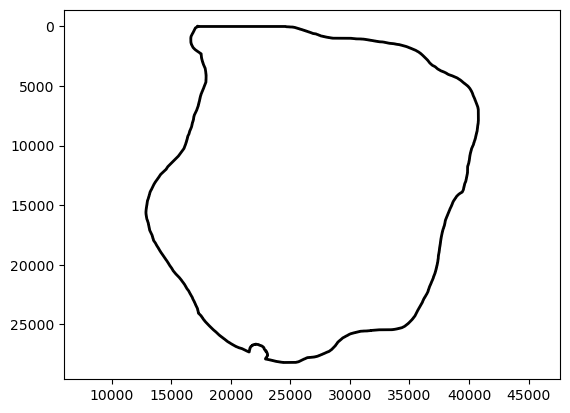

In [ ]:
# Crop out the manually annotated tumour-bulk containing regions. 
tumor_annotations = [annotation for annotation in wsa.annotations if annotation.label.name == "tumor-bulk"]
plot_annotations(tumor_annotations)

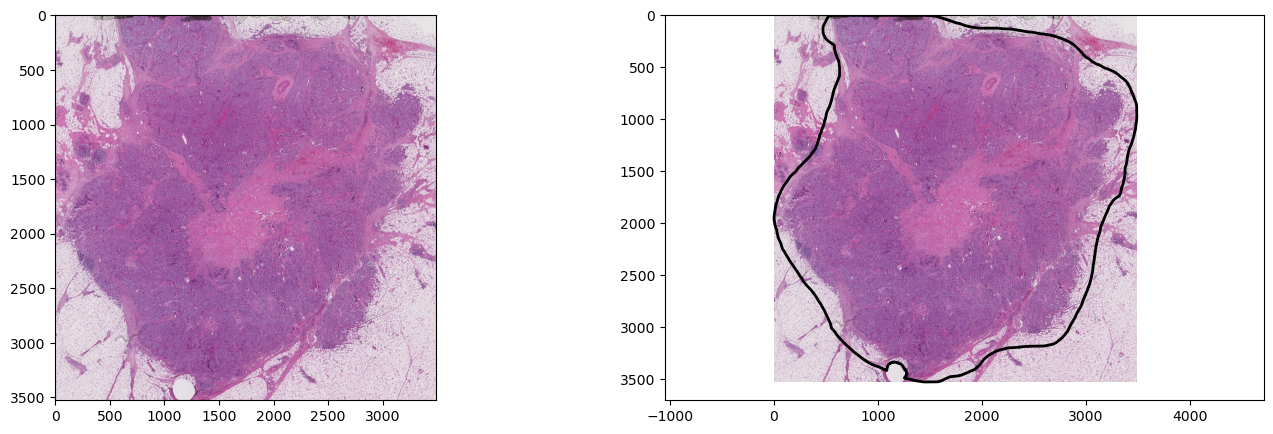

In [ ]:
# Display the manually annotated tumour-bulk containing regions. 
region = wsi.get_region_from_annotations([wsa.sampling_annotations[0]], spacing=4.0)
fig, ax = plt.subplots(1,2, figsize=(17,5))
plot_patch(region, ax=ax[0])
plot_patch(region, ax=ax[1])
plot_annotations(tumor_annotations, ax=ax[1], scale=1/8, use_base_coordinates=True)
plt.show()

In [ ]:
# Extract 300x300 pixel patches from the cropped-out region & print the number of patches extracted.                                   

num_patches = 0
for annotation in tumor_annotations: 
    bounds = wsi.get_region_from_annotations(annotations=[annotation],spacing=1)
#     print(annotation.coordinates[0])
    patch = wsi.get_patch(*annotation.center, 300, 300, spacing=1)
    patches = extract_patches_2d(patch, patch_size=(300, 300))
    num_patches += len(patches)
print("Number of 300x300 patches extracted:", num_patches)

Number of 300x300 patches extracted: 1


In [ ]:
from sklearn.feature_extraction.image import extract_patches


ImportError: cannot import name 'extract_patches' from 'sklearn.feature_extraction.image' (C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_extraction\image.py)

In [ ]:
num_patches = 0
for annotation in tumor_annotations:
    bounds = wsi.get_region_from_annotations(annotations=[annotation], spacing=1)
    patch = wsi.get_patch(*annotation.center, *annotation.size, spacing=0.4)
    patches = extract_patches_2d(patch, (300,300))
    num_patches += len(patches)
print("Number of 300x300 patches extracted:", num_patches)

MemoryError: Unable to allocate 189. TiB for an array with shape (27911, 27623, 1, 300, 300, 3) and data type uint8

In [ ]:
num_patches = 0
for index in tumor_annotations:
    region = wsa.get_roi(index)
    patches = ws.extract_patches(region, patch_size=(300, 300), overlap=0.5)
    num_patches += len(patches)
print("Number of 300x300 patches extracted:", num_patches)

AttributeError: 'WholeSlideAnnotation' object has no attribute 'get_roi'

NameError: name 'annotations_on_image' is not defined

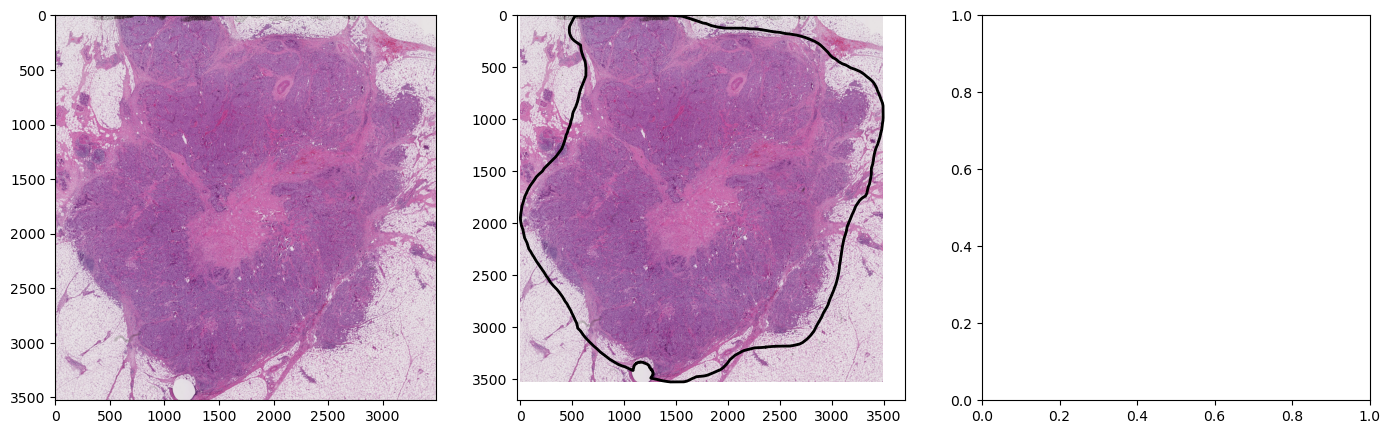

In [ ]:
for idx in range(3):
    region = wsi.get_region_from_annotations([wsa.sampling_annotations[idx]], spacing=4.0)
    annotations = wsa.select_annotations(*wsa.sampling_annotations[idx].center, *wsa.sampling_annotations[idx].size)
    annotations = sorted(annotations, key=lambda x: x.area, reverse=True)
    offset = wsa.sampling_annotations[idx].bounds[:2]
#     annotations_on_image = plot_annotations2(region, annotations, offset=offset,  ratio=8, color_map=TIGER_COLORS_RGB,fill=True)
    fig, ax = plt.subplots(1,3, figsize=(17,5))
    plot_patch(region, ax=ax[0])
    plot_patch(region, ax=ax[1])
    plot_annotations(annotations, ax=ax[1], scale=1/8, use_base_coordinates=True)
    plot_patch(annotations_on_image, ax=ax[2])
    
    for a in ax:
        a.invert_yaxis()
    plt.show()

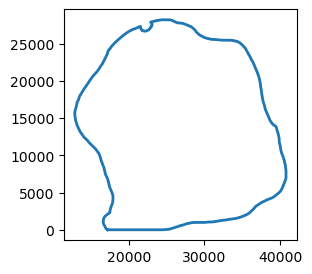

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
# ax.imshow(wsi.get_image())
for annotation in tumor_annotations:
    vertices = np.array(annotation.coordinates)
    ax.plot(vertices[:,0], vertices[:,1], linewidth=2)
plt.show()